<a href="https://colab.research.google.com/github/gustavohroos/treinamento-h2ia/blob/main/KMeans/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#Algoritmo


In [12]:
class KMeans():
     
    def __init__(self, K, max_iter):
        self.K = K
        self.max_iter = max_iter
        self.centroids = []
        self.clusters = [[] for _ in range(self.K)]
    
    def fit(self, X):
        self.X = X
        self.n_samples, self.n_features = X.shape

        random_centroids = np.random.choice(self.n_samples, self.K, replace=False)
        self.centroids = [self.X[index] for index in random_centroids]

        for _ in range(self.max_iter):
            self.clusters = self.get_clusters(self.centroids)

            old_centroids = self.centroids
            self.centroids = self.get_centroids(self.clusters)

            if self.is_converged(old_centroids, self.centroids):
                break

        return self.get_clusters_labels(self.clusters)
    
    def get_clusters(self, centroids):
        clusters = [[] for _ in range(self.K)]
        for index, sample in enumerate(self.X):
            centroid_index = self.closest_centroid(sample, centroids)
            clusters[centroid_index].append(index)
        return clusters

    def closest_centroid(self, sample, centroids):
        distances = []
        for centroid in centroids:
            distance = self.euclidean_distance(sample, centroid)
            distances.append(distance)
        closest = np.argmin(distances)
        return closest

    def get_centroids(self, clusters):
        centroids = np.zeros((self.K, self.n_features))
        for index, cluster in enumerate(clusters):
            cluster_mean = np.mean(self.X[cluster], axis=0)
            centroids[index] = cluster_mean
        return centroids

    def get_clusters_labels(self, clusters):
        labels = np.empty(self.n_samples, dtype=int)
        
        for index, cluster in enumerate(clusters):
            for sample_index in cluster:
                labels[sample_index] = index
        return labels

    def euclidean_distance(self, sample, centroid):
        return np.sqrt(np.sum((sample - centroid)**2))

    def is_converged(self, old_centroids, new_centroids):
        distances = [self.euclidean_distance(old_centroids[i], new_centroids[i]) for i in range(self.K)]
        if sum(distances): return False
        return True

    def predict(self, sample):
        distances = [self.euclidean_distance(self.centroids[i], sample) for i in range(self.K)]
        closest = np.argmin(distances)
        return closest


#Dados

In [13]:
X, y = load_iris(return_X_y=True)
df = pd.DataFrame(data= np.c_[X, y], columns= ['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width', 'target'])
df

,sepal_lenght,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


###Removendo os labels

In [14]:
cols = ['sepal_lenght', 'sepal_width', 'petal_length', 'petal_width']
data_without_labels = df[cols]
data_without_labels

,sepal_lenght,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


##Normalizando

In [15]:
normalized_data = StandardScaler().fit_transform(data_without_labels)
normalized_data = pd.DataFrame(data=normalized_data, columns=cols)
normalized_data

,sepal_lenght,sepal_width,petal_length,petal_width
0,-0.900681,1.019004,-1.340227,-1.315444
1,-1.143017,-0.131979,-1.340227,-1.315444
2,-1.385353,0.328414,-1.397064,-1.315444
3,-1.506521,0.098217,-1.283389,-1.315444
4,-1.021849,1.249201,-1.340227,-1.315444
...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832
146,0.553333,-1.282963,0.705921,0.922303
147,0.795669,-0.131979,0.819596,1.053935
148,0.432165,0.788808,0.933271,1.448832


##Aplicando *Principal Component Analysis* para diminuir as dimensões do dataset

In [16]:
pca = PCA(n_components=2)
x_transformed = pca.fit_transform(normalized_data)
x1 = x_transformed[:, 0]
x2 = x_transformed[:, 1]

x_transformed

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538],
       [-2.07563095,  1.48917752],
       [-2.44402884,  0.0476442 ],
       [-2.23284716,  0.22314807],
       [-2.33464048, -1.11532768],
       [-2.18432817, -0.46901356],
       [-2.1663101 ,  1.04369065],
       [-2.32613087,  0.13307834],
       [-2.2184509 , -0.72867617],
       [-2.6331007 , -0.96150673],
       [-2.1987406 ,  1.86005711],
       [-2.26221453,  2.68628449],
       [-2.2075877 ,  1.48360936],
       [-2.19034951,  0.48883832],
       [-1.898572  ,  1.40501879],
       [-2.34336905,  1.12784938],
       [-1.914323  ,  0.40885571],
       [-2.20701284,  0.92412143],
       [-2.7743447 ,  0.45834367],
       [-1.81866953,  0.08555853],
       [-2.22716331,  0.13725446],
       [-1.95184633, -0.62561859],
       [-2.05115137,  0.24216355],
       [-2.16857717,  0.52714953],
       [-2.13956345,

#Teste

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 2 0 0
 2 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


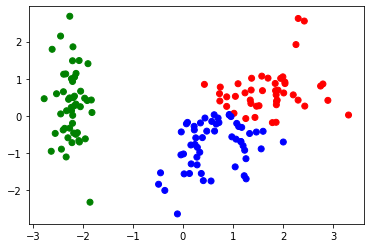

In [17]:
model = KMeans(3, 100)
classifications = model.fit(x_transformed)
print(classifications)
colors = ['red', 'green', 'blue']
classes_colored = [colors[x_transformed] for x_transformed in classifications]

plt.scatter(x1, x2, c=classes_colored)

#Predição

0 == Vermelho<br>
1 == Verde<br>
2 == Azul<br>

In [18]:
sample = [ 1 , 2]
model.predict(sample)

0

In [19]:
sample = [ -1.5 , 0]
model.predict(sample)

1

In [20]:
sample = [ 0 , -1]
model.predict(sample)

2